## Import The Relevent Packages

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Flatten, Dense

## Load The Data

In [13]:
# Load The Data
train_images = mnist.train_images() # training data images
train_labels = mnist.train_labels() # training data labels

test_images = mnist.test_images() # training data images
test_labels = mnist.test_labels() # training data labels


# Normalize the images. Normalize the pixel value from [0, 255] tp
# [0 or 1] to make our network easier to train
train_images = train_images/255 
test_images = test_images/255 

# we need to add one dummy dimention for color channel i/p_image = (28, 28) so we need to add one dimention
train_images = train_images[...,np.newaxis]
test_images = test_images[...,np.newaxis]


print(train_images[0].shape) # With Dummy Dimention (28, 28, 1)
print(test_images[0].shape)  # With Dummy Dimention (28, 28, 1)
print(train_labels[:5])      # Sparse Type [5 0 4 1 9] 

(28, 28, 1)
(28, 28, 1)
[5 0 4 1 9]


## Build The Model

In [3]:
# input_shape = (28, 28, 1) = (input_image_dimention, no of color channels)
model = Sequential([
        Conv2D(16, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
        MaxPooling2D((3,3)),
        Flatten(),
        Dense(64, activation = 'relu'),
        Dense(10, activation = 'softmax')
    ])

## Compile The Model

In [4]:
# Compile the model
# The loss function measures how well the model did on training , and then tries to improve on it using optimizer
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', # (class the are greater then 2), and o/p labels int type
    metrics = ['accuracy']
)

## Train The Model

In [5]:
# Train The Model
history = model.fit(
    train_images, 
    train_labels, 
    epochs = 5,
    verbose = 1
)    

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 163us/sample - loss: 0.2141 - accuracy: 0.9388
Epoch 2/5
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0751 - accuracy: 0.9772
Epoch 3/5
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0566 - accuracy: 0.9824
Epoch 4/5
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0460 - accuracy: 0.9856
Epoch 5/5
60000/60000 [==============================] - 10s 160us/sample - loss: 0.0369 - accuracy: 0.9883


##  Load The Model History

In [6]:
frame = pd.DataFrame(history.history)

## Graph For Epoch vs accuracy

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

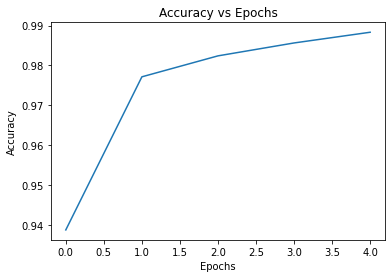

In [7]:
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

## Graph For Loss vs Epochs

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

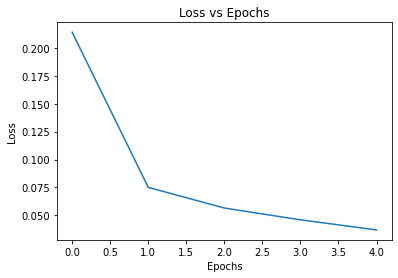

In [8]:
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

## Evaluate The model

In [14]:
# Evaluate The model
test_loss, test_accuracy = model.evaluate(
        test_images,
        test_labels,
        verbose = 0
    )
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test loss: 0.04050631869985955
Test accuracy: 0.9865000247955322


## Model predictions

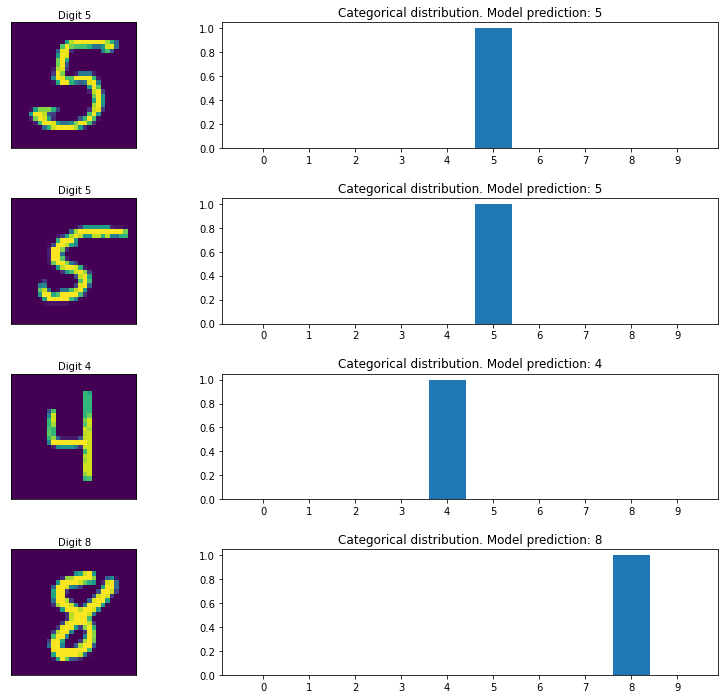

In [15]:
# Predict The Model With random test Inputs
num_test_images = test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = test_images[random_inx]
random_test_labels = test_labels[random_inx]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()